# Project: Investigate a Dataset (Medical Appointment No Shows)
## Name: Ashinze Emmanuel Chidi
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Section I: Introduction

**Dataset**: [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

**Description**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**Columns Description**
- **`PatientId`**:  The patient's ID(Identification Number)
- **`AppointmentID`**: Appointment ID(Identification Nunber) this field should be unique for each appointment
- **`Gender`**: Patient's gender (Male/Female)     
- **`ScheduledDay`**: The day of the actuall appointment, when they have to visit the doctor.
- **`AppointmentDay`**:  The day someone called or registered the appointment, this is before appointment of course.
- **`Age`**: How old is the patient
- **`Neighborhood`**: Where the appointment takes place(Health Center Location)
- **`Scholarship`**: Shows whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.(1 if true, 0 if False)
- **`Hipertension`**: Tells if the patient is experiencing Hypertension.(1 if true, 0 if False)
- **`Diabetes`**:Tells if the patient is experiencing Diabetes.(1 if true, 0 if False)
- **`Alcoholism`**:Tells if thepatient is experiencing Alcoholism.(1 if true, 0 if False)
- **`Handcap`**: Tells if the patient is with special needs.(Ranking from 0-4 to show the level of special needs)
- **`SMS_received`**: Tells if the patient has received a reminder text message and the number of messages received(1 if true, 0 if False)
- **`Show-up`**: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

***We will be investigating the dataset to uncover the following:***
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2. How do the Factors vary with Each Other?

**Research Areas**
1. `Target Variable(Absent)`: studying the trends in the absent study overall proportions to help in the analysis with other variables
2. `Univariate Analysis`: Studying each variable to uncover patterns and how they relate with the target variable. How does `Age`, `Gender`, `Neighbourhood` and `Scholarship` influence a patient from attending the Hospital appointment.
3. `Multivariate Analysis`: Studyying how the variables relate with one another and how they can help in predicting the target variable. How do the variables affect each other(Correlation) and affects the target variable.

**LIMITATIONS**

1. Time was set to 00:00:00 for all cases, analysis was only carried in days. Cases of Having an appointment and schedule on the same day could not be used for the analysis
2. The data was not totally consistent, some unusual forms of data and irregularities were found which could have affected the analysis because it was dropped.
3. Most of the columns are categorical, hence the use of Bar charts and Pie charts, Only Age was quantitative and could be visualised with appropraite means.
4. The Neighbourhood Data should have included the gographical coordinates for better analysis as to how a location can affect the choice of the patient



In [100]:
#Importing all the required libraries and includin a 'magic word' so that visualizations are plotted
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [101]:
#reading the dataset with pandas
df = pd.read_csv("C:/Users/ashin/Downloads/noshowappointments-kagglev2-may-2016.csv")

<a id='wrangling'></a>
## Section II: Data Wrangling
Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis



### 1. General Properties (Dataset dimensions, columns/ rows/ data types)

In [102]:
#checking for the basic properties of the Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This Dataset has 14 columns and 110527 rows

In [103]:
df.head()
#checking the first 5 rows 

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [104]:
df.tail()
#display the last 5 rows

PatientId  AppointmentID Gender          ScheduledDay  \
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
110522  2016-06-07T00:00:00Z   56   MARIA ORTIZ            0             0   
110523  2016-06-07T00:00:00Z   51   MARIA ORTIZ            0             0   
110524  2016-06-07T00:00:00Z   21   MARIA ORTIZ            0             0   
110525  2016-06-07T00:00:00Z   38   MARIA ORTIZ            0             0   
110526  2016-06-07T00:00:00Z   54   MARIA ORTIZ            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received No-show  
110522         0           0        0             1      No  
110523         0           0        0             1      No  
110524         0           0        0             1      No  
110525         0           0        0             1      No  
110526         0           0        0             1      No

In [105]:
df.dtypes
# Checking the data types

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [106]:
df.describe(include='all')
# describing the data using the describw function.

PatientId  AppointmentID  Gender          ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                110527   
unique           NaN            NaN       2                103549   
top              NaN            NaN       F  2016-05-06T07:09:54Z   
freq             NaN            NaN   71840                    24   
mean    1.474963e+14   5.675305e+06     NaN                   NaN   
std     2.560949e+14   7.129575e+04     NaN                   NaN   
min     3.921784e+04   5.030230e+06     NaN                   NaN   
25%     4.172614e+12   5.640286e+06     NaN                   NaN   
50%     3.173184e+13   5.680573e+06     NaN                   NaN   
75%     9.439172e+13   5.725524e+06     NaN                   NaN   
max     9.999816e+14   5.790484e+06     NaN                   NaN   

              AppointmentDay            Age   Neighbourhood    Scholarship  \
count                 110527  110527.000000          110527  110527.000000   
unique                    27            NaN              81            NaN   
top     2016-06-06T00:00:00Z            NaN  JARDIM CAMBURI            NaN   
freq                    4692            NaN            7717            NaN   
mean                     NaN      37.088874             NaN       0.098266   
std                      NaN      23.110205             NaN       0.297675   
min                      NaN      -1.000000             NaN       0.000000   
25%                      NaN      18.000000             NaN       0.000000   
50%                      NaN      37.000000             NaN       0.000000   
75%                      NaN      55.000000             NaN       0.000000   
max                      NaN     115.000000             NaN       1.000000   

         Hipertension       Diabetes     Alcoholism        Handcap  \
count   110527.000000  110527.000000  110527.000000  110527.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.197246       0.071865       0.030400       0.022248   
std          0.397921       0.258265       0.171686       0.161543   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       1.000000       1.000000       4.000000   

         SMS_received No-show  
count   110527.000000  110527  
unique            NaN       2  
top               NaN      No  
freq              NaN   88208  
mean         0.321026     NaN  
std          0.466873     NaN  
min          0.000000     NaN  
25%          0.000000     NaN  
50%          0.000000     NaN  
75%          1.000000     NaN  
max          1.000000     NaN

Looking at the dataset, we have Quantitative and Categorical Variables and the nature of variables will affect the nature of analysis 

1. **Categorical Data:** ``Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show``
2. **Quantitative Data:** ``PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay``

The Dataset is not in the best form for analysis as we need to clean it to make it appropraite for analysis. We have to:
1. Check for missing Values
2. Duplicates
3. Data Validation(Checking for unusual data)
4. Data Cleaning 

**1.Missing values**

In [107]:
# Check if there is any missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in the dataset

**2.Duplicates**


In [108]:
# Check for duplicate rows 
df.duplicated().sum()

0

There are no duplicate rows in the dataset

In [109]:
 # checking if there are duplicates in each column
def check_column_duplicates():
    column_list = list(df.columns)
    for column in column_list:
        print(f'{column}   has   {sum(df[column].duplicated())}   duplicates \n')
check_column_duplicates()

PatientId   has   48228   duplicates 

AppointmentID   has   0   duplicates 

Gender   has   110525   duplicates 

ScheduledDay   has   6978   duplicates 

AppointmentDay   has   110500   duplicates 

Age   has   110423   duplicates 

Neighbourhood   has   110446   duplicates 

Scholarship   has   110525   duplicates 

Hipertension   has   110525   duplicates 

Diabetes   has   110525   duplicates 

Alcoholism   has   110525   duplicates 

Handcap   has   110522   duplicates 

SMS_received   has   110525   duplicates 

No-show   has   110525   duplicates 



It is noticed that there are duplicates in the columns but it is easily understandable as the Categorical variables are repeated. The Variable of interest is the `PatientID` as it shows if a patient has multiple appointments. Also,we can confirm that  `AppointmentID` is unique, meaning each appointment is unique 

In [110]:
#Checking the first 10 patients with most appointments
df.PatientId.value_counts().head(10)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
2.584244e+11    62
8.713749e+14    62
7.579746e+13    62
6.684488e+13    57
8.722785e+11    55
Name: PatientId, dtype: int64

**3. Data Validation(Checking for unusual data)**

Data validation is the process of ensuring data has undergone data cleansing to ensure they have data quality, that is, that they are both correct and useful.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [112]:
#checking the PatientID 
df.query('PatientId <= 0')

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

The `PatientId` colunmn has no values that is zero or negative

In [113]:
#checking the AppointmentID
df.query('AppointmentID <= 0')

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

The `AppointmentId` colunmn has no values that is zero or negative

In [114]:
#checking the Gender column
df['Gender'].unique()

array(['F', 'M'], dtype=object)

The Gender Column has two unique values,Male and Female

In [115]:
#Checking the ScheduledDay Column
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [116]:
#Checking the AppointmentDay Column
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [117]:
#check the age for negative values
df.query('Age < 0')

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

There are negative values in the Age which suggests that this is an unusual value, it is not possible to have negative age, it will be addressed in the data cleaning section

In [118]:
#Checking the Neighbourhood column
print(df['Neighbourhood'].unique(),df['Neighbourhood'].nunique())

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA'


The Neighbourhood column has 81 unique values. There are people from 81 distinct neighbourhood in dataset 

In [119]:
#checking the Scholarship Column
df['Scholarship'].unique()

array([0, 1], dtype=int64)

The Scholarship column has two unique values. Binary Categorical Variable


In [120]:
#Checking the Hipertension Column
df['Hipertension'].unique()

array([1, 0], dtype=int64)

The Hipertension column has two unique values. Binary Categorical Variable

In [121]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

The Diabetes column has two unique values. Binary Categorical Variable

In [122]:
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

The Alcoholism column has two unique values. Binary Categorical Variable

In [123]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

The Handcap column has 5 unique values.Categorical Variable

In [124]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

The SMS_received column has two unique values. Binary Categorical Variable

In [125]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

The No-show column has two unique values. Binary Categorical Variable

**Summary**

After exploring the columns, we noticed some irregularities in the data that will addressed in the next section


**4.Data Cleaning**

In [126]:
#Renaming Columns
df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Absent']

In [127]:
df.head()

PatientID  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received Absent  
0         0           0         0             0     No  
1         0           0         0             0     No  
2         0           0         0             0     No  
3         0           0         0             0     No  
4         1           0         0             0     No

In [128]:
#Convert  PatientID to int64
df['PatientID'] = df['PatientID'].astype('int64')

In [129]:
#Change ApppointmentDay column to the day and date of appointment
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['Appointmentday'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()
df.drop('AppointmentDay',axis=1, inplace = True)

In [130]:
#checking the data set to confirm changes
df

PatientID  AppointmentID Gender          ScheduledDay  Age  \
0        29872499824296        5642903      F  2016-04-29T18:38:08Z   62   
1       558997776694438        5642503      M  2016-04-29T16:08:27Z   56   
2         4262962299951        5642549      F  2016-04-29T16:19:04Z   62   
3          867951213174        5642828      F  2016-04-29T17:29:31Z    8   
4         8841186448183        5642494      F  2016-04-29T16:07:23Z   56   
...                 ...            ...    ...                   ...  ...   
110522    2572134369293        5651768      F  2016-05-03T09:15:35Z   56   
110523    3596266328735        5650093      F  2016-05-03T07:27:33Z   51   
110524   15576631729893        5630692      F  2016-04-27T16:03:52Z   21   
110525   92134931435557        5630323      F  2016-04-27T15:09:23Z   38   
110526  377511518121127        5629448      F  2016-04-27T13:30:56Z   54   

            Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0         JARDIM DA PENHA            0             1         0           0   
1         JARDIM DA PENHA            0             0         0           0   
2           MATA DA PRAIA            0             0         0           0   
3       PONTAL DE CAMBURI            0             0         0           0   
4         JARDIM DA PENHA            0             1         1           0   
...                   ...          ...           ...       ...         ...   
110522        MARIA ORTIZ            0             0         0           0   
110523        MARIA ORTIZ            0             0         0           0   
110524        MARIA ORTIZ            0             0         0           0   
110525        MARIA ORTIZ            0             0         0           0   
110526        MARIA ORTIZ            0             0         0           0   

        Handicap  SMS_received Absent AppointmentDate Appointmentday  
0              0             0     No      2016-04-29         Friday  
1              0             0     No      2016-04-29         Friday  
2              0             0     No      2016-04-29         Friday  
3              0             0     No      2016-04-29         Friday  
4              0             0     No      2016-04-29         Friday  
...          ...           ...    ...             ...            ...  
110522         0             1     No      2016-06-07        Tuesday  
110523         0             1     No      2016-06-07        Tuesday  
110524         0             1     No      2016-06-07        Tuesday  
110525         0             1     No      2016-06-07        Tuesday  
110526         0             1     No      2016-06-07        Tuesday  

[110527 rows x 15 columns]

In [131]:
#Change the ScheduledDay  to date 
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df.drop('ScheduledDay',axis=1, inplace = True)

In [132]:
df
#checking the data set to confirm changes

PatientID  AppointmentID Gender  Age      Neighbourhood  \
0        29872499824296        5642903      F   62    JARDIM DA PENHA   
1       558997776694438        5642503      M   56    JARDIM DA PENHA   
2         4262962299951        5642549      F   62      MATA DA PRAIA   
3          867951213174        5642828      F    8  PONTAL DE CAMBURI   
4         8841186448183        5642494      F   56    JARDIM DA PENHA   
...                 ...            ...    ...  ...                ...   
110522    2572134369293        5651768      F   56        MARIA ORTIZ   
110523    3596266328735        5650093      F   51        MARIA ORTIZ   
110524   15576631729893        5630692      F   21        MARIA ORTIZ   
110525   92134931435557        5630323      F   38        MARIA ORTIZ   
110526  377511518121127        5629448      F   54        MARIA ORTIZ   

        Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0                 0             1         0           0         0   
1                 0             0         0           0         0   
2                 0             0         0           0         0   
3                 0             0         0           0         0   
4                 0             1         1           0         0   
...             ...           ...       ...         ...       ...   
110522            0             0         0           0         0   
110523            0             0         0           0         0   
110524            0             0         0           0         0   
110525            0             0         0           0         0   
110526            0             0         0           0         0   

        SMS_received Absent AppointmentDate Appointmentday ScheduledDate  
0                  0     No      2016-04-29         Friday    2016-04-29  
1                  0     No      2016-04-29         Friday    2016-04-29  
2                  0     No      2016-04-29         Friday    2016-04-29  
3                  0     No      2016-04-29         Friday    2016-04-29  
4                  0     No      2016-04-29         Friday    2016-04-29  
...              ...    ...             ...            ...           ...  
110522             1     No      2016-06-07        Tuesday    2016-05-03  
110523             1     No      2016-06-07        Tuesday    2016-05-03  
110524             1     No      2016-06-07        Tuesday    2016-04-27  
110525             1     No      2016-06-07        Tuesday    2016-04-27  
110526             1     No      2016-06-07        Tuesday    2016-04-27  

[110527 rows x 15 columns]

Creating a new feature `Waiting interval` for better analysis

In [133]:
#create waiting interval by getting difference between appointment and schedule date
df['WaitingInterval'] = df.AppointmentDate - df.ScheduledDate

In [134]:
df.head()
#checking the data set to confirm changes

PatientID  AppointmentID Gender  Age      Neighbourhood  Scholarship  \
0   29872499824296        5642903      F   62    JARDIM DA PENHA            0   
1  558997776694438        5642503      M   56    JARDIM DA PENHA            0   
2    4262962299951        5642549      F   62      MATA DA PRAIA            0   
3     867951213174        5642828      F    8  PONTAL DE CAMBURI            0   
4    8841186448183        5642494      F   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handicap  SMS_received Absent  \
0             1         0           0         0             0     No   
1             0         0           0         0             0     No   
2             0         0           0         0             0     No   
3             0         0           0         0             0     No   
4             1         1           0         0             0     No   

  AppointmentDate Appointmentday ScheduledDate WaitingInterval  
0      2016-04-29         Friday    2016-04-29          0 days  
1      2016-04-29         Friday    2016-04-29          0 days  
2      2016-04-29         Friday    2016-04-29          0 days  
3      2016-04-29         Friday    2016-04-29          0 days  
4      2016-04-29         Friday    2016-04-29          0 days

In [135]:
#check for patients with negative waiting interval
df[df['WaitingInterval'] < '0 days']

PatientID  AppointmentID Gender  Age  Neighbourhood  Scholarship  \
27033    7839272661752        5679978      M   38    RESISTÊNCIA            0   
55226    7896293967868        5715660      F   19  SANTO ANTÔNIO            0   
64175   24252258389979        5664962      F   22     CONSOLAÇÃO            0   
71533  998231581612122        5686628      F   81  SANTO ANTÔNIO            0   
72362    3787481966821        5655637      M    7     TABUAZEIRO            0   

       Hypertension  Diabetes  Alcoholism  Handicap  SMS_received Absent  \
27033             0         0           0         1             0    Yes   
55226             0         0           0         1             0    Yes   
64175             0         0           0         0             0    Yes   
71533             0         0           0         0             0    Yes   
72362             0         0           0         0             0    Yes   

      AppointmentDate Appointmentday ScheduledDate WaitingInterval  
27033      2016-05-09         Monday    2016-05-10         -1 days  
55226      2016-05-17        Tuesday    2016-05-18         -1 days  
64175      2016-05-04      Wednesday    2016-05-05         -1 days  
71533      2016-05-05       Thursday    2016-05-11         -6 days  
72362      2016-05-03        Tuesday    2016-05-04         -1 days

In [136]:
#removing instances with negative waiting instances from the dataset
df = df[df['AppointmentDate'] >= df['ScheduledDate']]
df.shape

(110522, 16)

In [137]:
#removing negative age instance from the analysis
df = df[df.Age != -1]
df.shape

(110521, 16)

In [138]:
df

PatientID  AppointmentID Gender  Age      Neighbourhood  \
0        29872499824296        5642903      F   62    JARDIM DA PENHA   
1       558997776694438        5642503      M   56    JARDIM DA PENHA   
2         4262962299951        5642549      F   62      MATA DA PRAIA   
3          867951213174        5642828      F    8  PONTAL DE CAMBURI   
4         8841186448183        5642494      F   56    JARDIM DA PENHA   
...                 ...            ...    ...  ...                ...   
110522    2572134369293        5651768      F   56        MARIA ORTIZ   
110523    3596266328735        5650093      F   51        MARIA ORTIZ   
110524   15576631729893        5630692      F   21        MARIA ORTIZ   
110525   92134931435557        5630323      F   38        MARIA ORTIZ   
110526  377511518121127        5629448      F   54        MARIA ORTIZ   

        Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0                 0             1         0           0         0   
1                 0             0         0           0         0   
2                 0             0         0           0         0   
3                 0             0         0           0         0   
4                 0             1         1           0         0   
...             ...           ...       ...         ...       ...   
110522            0             0         0           0         0   
110523            0             0         0           0         0   
110524            0             0         0           0         0   
110525            0             0         0           0         0   
110526            0             0         0           0         0   

        SMS_received Absent AppointmentDate Appointmentday ScheduledDate  \
0                  0     No      2016-04-29         Friday    2016-04-29   
1                  0     No      2016-04-29         Friday    2016-04-29   
2                  0     No      2016-04-29         Friday    2016-04-29   
3                  0     No      2016-04-29         Friday    2016-04-29   
4                  0     No      2016-04-29         Friday    2016-04-29   
...              ...    ...             ...            ...           ...   
110522             1     No      2016-06-07        Tuesday    2016-05-03   
110523             1     No      2016-06-07        Tuesday    2016-05-03   
110524             1     No      2016-06-07        Tuesday    2016-04-27   
110525             1     No      2016-06-07        Tuesday    2016-04-27   
110526             1     No      2016-06-07        Tuesday    2016-04-27   

       WaitingInterval  
0               0 days  
1               0 days  
2               0 days  
3               0 days  
4               0 days  
...                ...  
110522         35 days  
110523         35 days  
110524         41 days  
110525         41 days  
110526         41 days  

[110521 rows x 16 columns]

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   PatientID        110521 non-null  int64          
 1   AppointmentID    110521 non-null  int64          
 2   Gender           110521 non-null  object         
 3   Age              110521 non-null  int64          
 4   Neighbourhood    110521 non-null  object         
 5   Scholarship      110521 non-null  int64          
 6   Hypertension     110521 non-null  int64          
 7   Diabetes         110521 non-null  int64          
 8   Alcoholism       110521 non-null  int64          
 9   Handicap         110521 non-null  int64          
 10  SMS_received     110521 non-null  int64          
 11  Absent           110521 non-null  object         
 12  AppointmentDate  110521 non-null  object         
 13  Appointmentday   110521 non-null  object         
 14  Sche

<a id='eda'></a>
# Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
We are going to be exploring the data with these questions in mind

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2. How do the Factors vary with Each Other?

**Research Areas**
1. `Target Variable(Absent)`: studying the trends in the absent study overall proportions to help in the analysis with other variables
2. `Univariate Analysis`: Studying each variable to uncover patterns and how they relate with the target variable. How does `Age`, `Gender`, `Neighbourhood` and `Scholarship` influence a patient from attending the Hospital appointment.
3. `Multivariate Analysis`: Studyying how the variables relate with one another and how they can help in predicting the target variable. How do the variables affect each other(Correlation) and affects the target variable.



Gender vs Scholarship

AgeGroup vs Scholarsip


These will be done with the appropraite analysis and visualisations.

1. **Target Variable**

`Absent`
This shows if a patient shows up for a scheduled appointment, `Yes` if absent and `No` if Present 

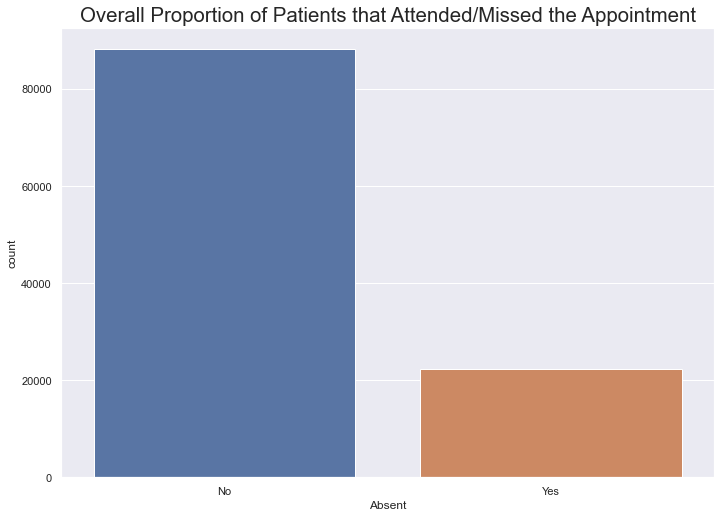

In [149]:
#plot a countplot with seaborn
sns.countplot(x='Absent',data=df)

sns.set(font_scale=1.7)

plt.title("Overall Proportion of Patients that Attended/Missed the Appointment");

It can be seen from the bar plot that a huge proportion of the patients did not miss their hospital appointmnent.

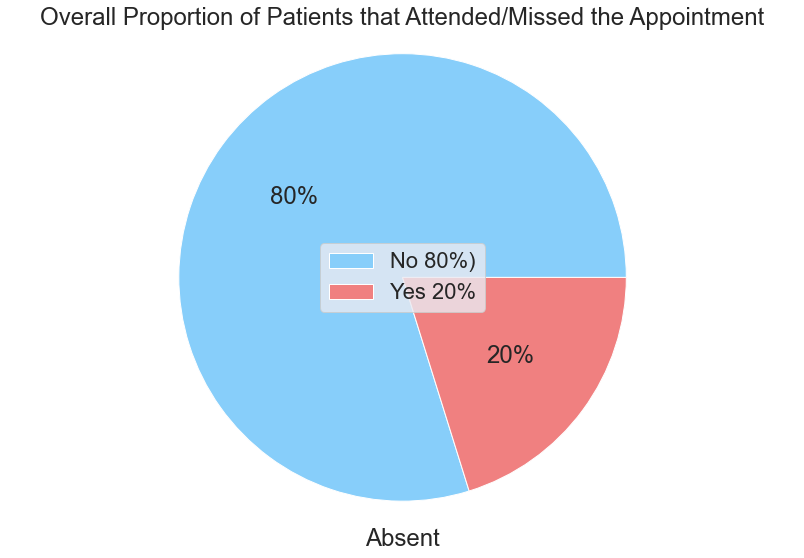

In [150]:
#plot piechart with seaborn
labels = [r'No 80%)',r'Yes 20%']
sizes =df['Absent'].value_counts()
colors = ['lightskyblue', 'lightcoral']
sns.set(font_scale=2)
patches, texts = plt.pie(sizes, colors=colors)
plt.legend(patches, labels, loc="center")
plt.pie(df['Absent'].value_counts(),autopct ='%.0f%%',colors=colors)
plt.title("Overall Proportion of Patients that Attended/Missed the Appointment")
plt.xlabel('Absent')
plt.axis('equal')
plt.tight_layout()
plt.show()


The pie chart shows us that only 20% of the patients missed their hospital appointment. We will be investigating the patterns in other features in the data set to be able to answer the research questions.

# Univariate Analysis
**1. Gender**

 The gender indicates the sex of the patient. It is a categorical variable. We will observe the trends by cheching the proportion

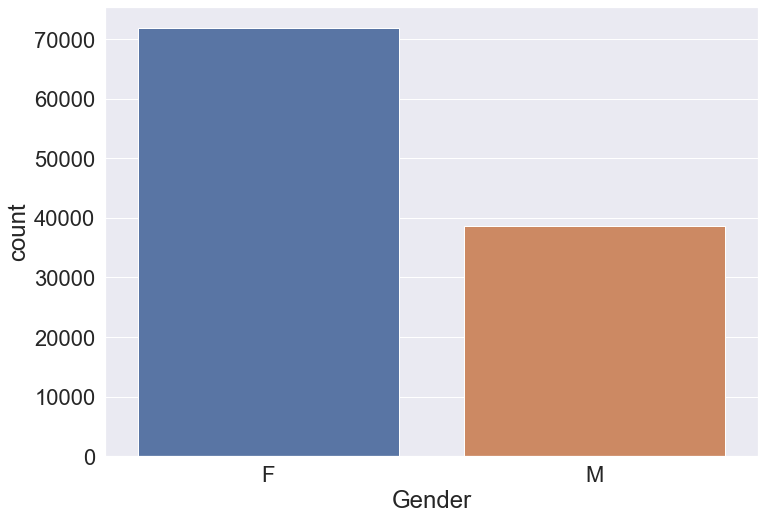

In [151]:
#plot countplot with seaborn
df['Gender'].value_counts()
sns.set(font_scale=2)
sns.countplot(x='Gender',data=df);


A huge proportion of all patients are Females. Over 70000 females and about 40000 males.

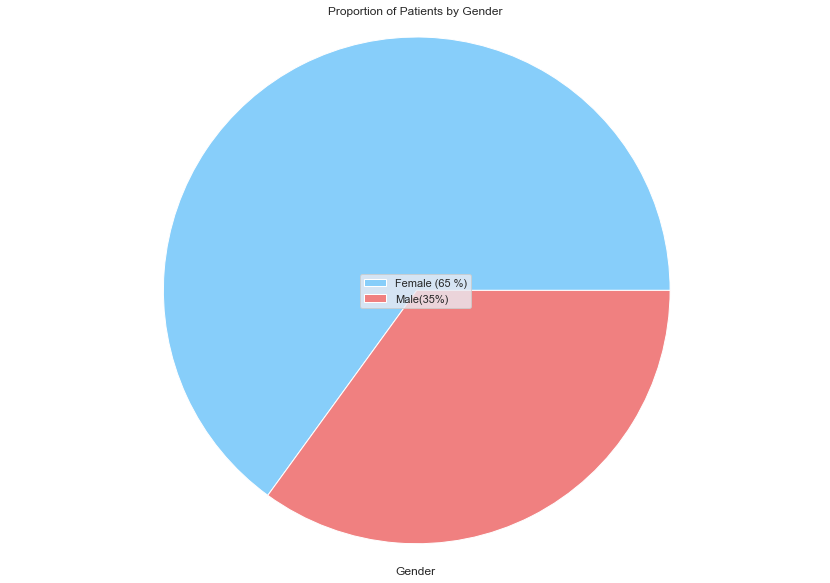

In [152]:
#create piechart with seaborn
labels = [r'Female (65 %)',r'Male(35%)' ]
sizes = df['Gender'].value_counts()
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
colors = ['lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors)
plt.legend(patches, labels, loc="center")
plt.title("Proportion of Patients by Gender")
plt.xlabel('Gender')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()


65% of the patients are Females and Males account for 35%. This means that Females dominate the dataset


**Does Gender Relate to Missing hospital Appointment?**

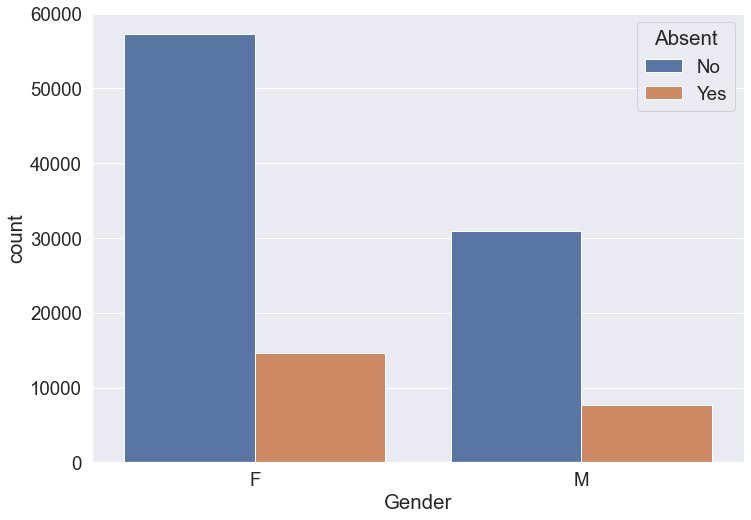

In [153]:
#create countplot with seaborn
sns.set(font_scale=1.7)
sns.countplot(x='Gender',data =df,hue ='Absent');


As seen from the overall proportion, a huge percentage of each gender did not miss the hospital appointment. Well Show the percentages with a pie chart.

In [154]:
#filterring the dataset according to gender
df_male = df[df.Gender == 'M']
df_female = df[df.Gender == 'F']

In [155]:
#plot a piechart with sns and matplotlib
labels = [r'No 80%)',r'Yes 20%']
sizes =df_male['Absent'].value_counts()
colors = ['lightskyblue', 'lightcoral']
sns.set(font_scale=2)
patches, texts = plt.pie(sizes, colors=colors)
plt.legend(patches, labels, loc="center")
plt.pie(df_male['Absent'].value_counts(),autopct ='%.0f%%',colors=colors)
plt.title("Overall Proportion of Patients that Attended/Missed the Appointment[MALE]")
plt.xlabel('Absent')
plt.axis('equal')
plt.tight_layout()
plt.show()


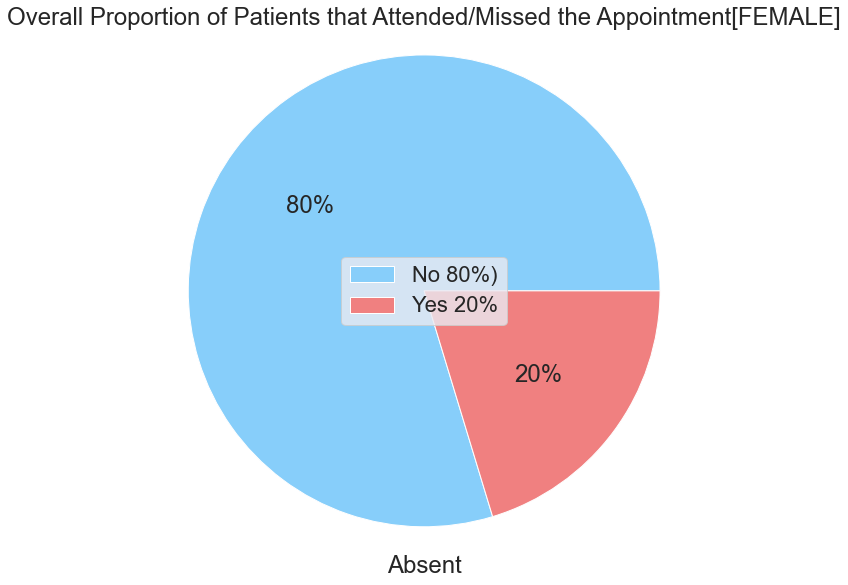

In [156]:
#plot a piechart with sns and matplotlib
labels = [r'No 80%)',r'Yes 20%']
sizes =df_female['Absent'].value_counts()
colors = ['lightskyblue', 'lightcoral']
sns.set(font_scale=2)
patches, texts = plt.pie(sizes, colors=colors)
plt.legend(patches, labels, loc="center")
plt.pie(df_female['Absent'].value_counts(),autopct ='%.0f%%',colors=colors)
plt.title("Overall Proportion of Patients that Attended/Missed the Appointment[FEMALE]")
plt.axis('equal')
plt.tight_layout()
plt.xlabel('Absent')
plt.show()


The proportion of Males and females that did not miss the hospital appointment are almost the same.

**2. Age**

Indicates how Old the patient is. It is a quantitative variable.

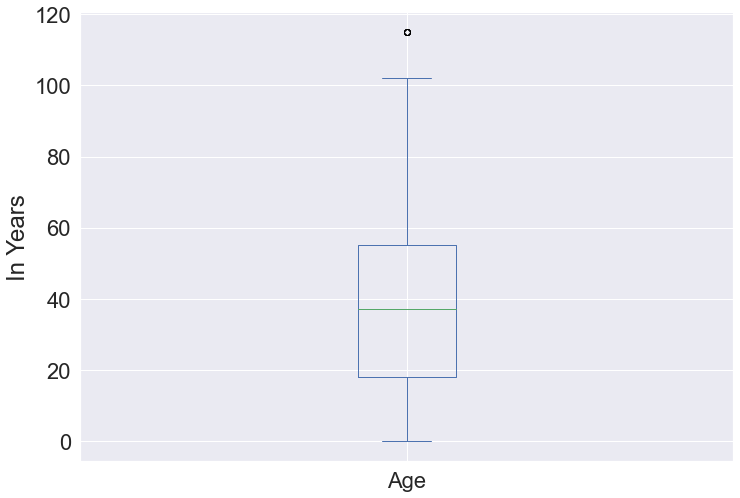

In [157]:
#creating a box plot 
df['Age'].plot(kind ='box')
plt.ylabel('In Years');

In [158]:
df['Age'].describe()
#getting info about the Age variable

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [159]:
#plot an histogram with matplotlib
df['Age'].plot(kind='hist');
plt.xlabel('Age(Years)')




Text(0.5, 0, 'Age(Years)')

The distribution of the age is positively skewed with a median age of 37 years old. The range is 0-115 years with the prescence of a high outlier(one patient is very old). To gain better insights, we will analyse the Age according to age groups.

In [160]:
#dividing age into age groups using the pandas cut function
df['Agegroup'] = pd.cut(x=df['Age'], bins=[0, 20, 40, 60, 80, 100,120],
                    labels=['0 - 20 years', '21 - 40 years', '41 - 60 years',
                            '61 - 80 years', '81- 100 years','100-120 years'])
 

In [161]:
#check the dataset to confirm changes
df

PatientID  AppointmentID Gender  Age      Neighbourhood  \
0        29872499824296        5642903      F   62    JARDIM DA PENHA   
1       558997776694438        5642503      M   56    JARDIM DA PENHA   
2         4262962299951        5642549      F   62      MATA DA PRAIA   
3          867951213174        5642828      F    8  PONTAL DE CAMBURI   
4         8841186448183        5642494      F   56    JARDIM DA PENHA   
...                 ...            ...    ...  ...                ...   
110522    2572134369293        5651768      F   56        MARIA ORTIZ   
110523    3596266328735        5650093      F   51        MARIA ORTIZ   
110524   15576631729893        5630692      F   21        MARIA ORTIZ   
110525   92134931435557        5630323      F   38        MARIA ORTIZ   
110526  377511518121127        5629448      F   54        MARIA ORTIZ   

        Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0                 0             1         0           0         0   
1                 0             0         0           0         0   
2                 0             0         0           0         0   
3                 0             0         0           0         0   
4                 0             1         1           0         0   
...             ...           ...       ...         ...       ...   
110522            0             0         0           0         0   
110523            0             0         0           0         0   
110524            0             0         0           0         0   
110525            0             0         0           0         0   
110526            0             0         0           0         0   

        SMS_received Absent AppointmentDate Appointmentday ScheduledDate  \
0                  0     No      2016-04-29         Friday    2016-04-29   
1                  0     No      2016-04-29         Friday    2016-04-29   
2                  0     No      2016-04-29         Friday    2016-04-29   
3                  0     No      2016-04-29         Friday    2016-04-29   
4                  0     No      2016-04-29         Friday    2016-04-29   
...              ...    ...             ...            ...           ...   
110522             1     No      2016-06-07        Tuesday    2016-05-03   
110523             1     No      2016-06-07        Tuesday    2016-05-03   
110524             1     No      2016-06-07        Tuesday    2016-04-27   
110525             1     No      2016-06-07        Tuesday    2016-04-27   
110526             1     No      2016-06-07        Tuesday    2016-04-27   

       WaitingInterval       Agegroup  
0               0 days  61 - 80 years  
1               0 days  41 - 60 years  
2               0 days  61 - 80 years  
3               0 days   0 - 20 years  
4               0 days  41 - 60 years  
...                ...            ...  
110522         35 days  41 - 60 years  
110523         35 days  41 - 60 years  
110524         41 days  21 - 40 years  
110525         41 days  21 - 40 years  
110526         41 days  41 - 60 years  

[110521 rows x 17 columns]

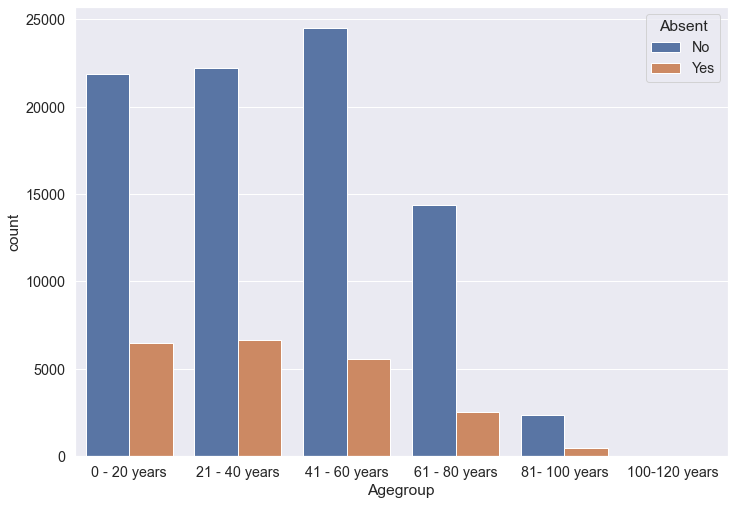

In [163]:
#plot a countplot with multiple variables
sns.countplot(x='Agegroup',data=df,hue='Absent')
sns.set(font_scale=1.3)

Across all age groups have a common trend of a larger proportion not missing the hospital appointments.

Text(0.5, 1.0, 'Proportion of Patients present for the Hospital Appointment according to Age group')

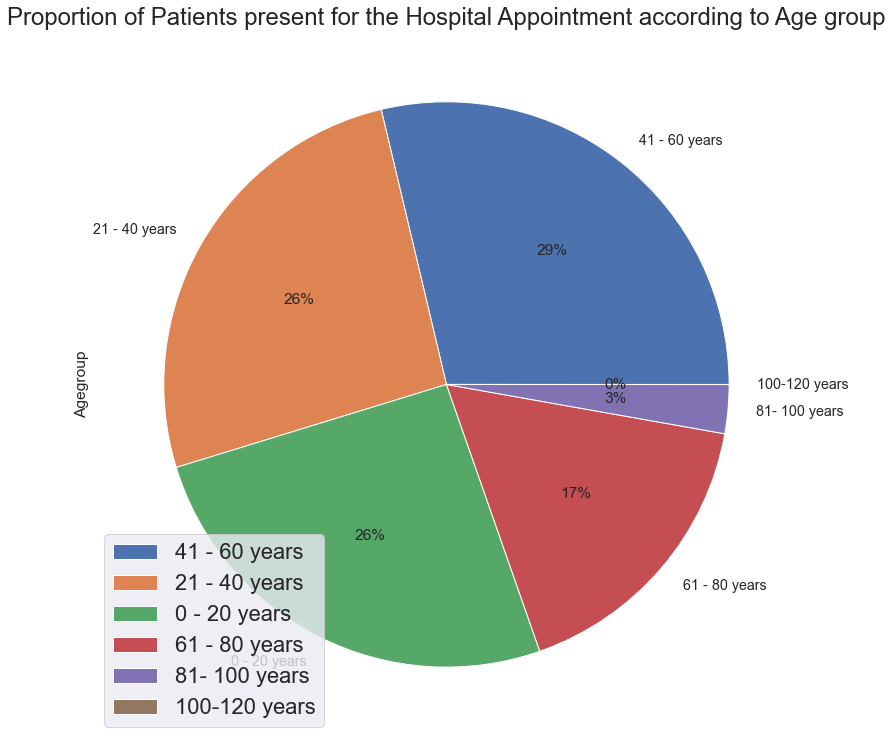

In [164]:
#splitting the Absent column into two
df_show = df[df.Absent == 'No']
df_noshow =df[df.Absent == 'Yes']
#plot a piechart with sns and matplotlib
df_show['Agegroup'].value_counts().plot(kind='pie',autopct ='%.0f%%',figsize=(15,13))
sns.set(font_scale=2)
plt.legend(loc ='lower left')
plt.title('Proportion of Patients present for the Hospital Appointment according to Age group')

The largest percentage of Patients not missing the hospital appointment is from the 41-60 years age group. This is as a result of people around that age group being prone to high risk diseases. In upcoming sections, age group will be analysed with some high risk diseases. 

In [165]:
df_show = df[df.Absent == 'No']
df_noshow =df[df.Absent == 'Yes']
#plot a piechart with sns and matplotlib
df_noshow['Agegroup'].value_counts().plot(kind='pie',autopct ='%.0f%%',figsize=(15,13))
sns.set(font_scale=2)
plt.legend(loc ='lower left')
plt.title('Proportion of Patients Absent for the Hospital Appointment according to Age group')

Text(0.5, 1.0, 'Proportion of Patients Absent for the Hospital Appointment according to Age group')

The largest percentage of Patients missing the hospital appointment is from the 21-40 years age group. This is as a result of people around that age group having to work for hours/lots of commitments or picking up habits  like alcoholism that will not allow them attend.In upcoming sections, age group will some of this behaviours.

**3. Neighbourhood**

Where the appointment takes place(Health Center Location). A categorical variable with 81 unique values.

In [166]:
#Top 10 Neighbourhoods with the highest number of patients

df['Neighbourhood'].value_counts().sort_values(ascending=False)[0:15].plot(kind ='bar')

plt.title('Top 10 Neighbourhoods with the highest number of patients')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients')

Text(0, 0.5, 'Number of Patients')

The JARDIM  CAMBURI Neighbourhood has the highest number of patients with about 8000 patients.

<AxesSubplot:>

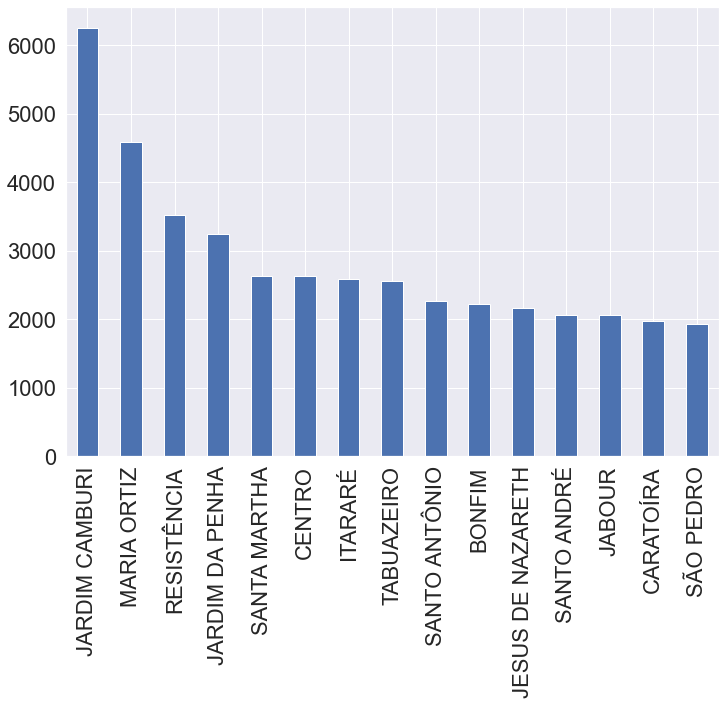

In [167]:
#checking the patients present for the appointment
df_show['Neighbourhood'].value_counts().sort_values(ascending=False)[0:15].plot(x='Neighbourhood',y='Absent',kind ='bar')

THE JARDIM CAMBURI neighbourhood also has the highest attendance. This could be due to its access to facilities

In [168]:
#Top 10 Neighbourhoods with the lowest number of patients

df['Neighbourhood'].value_counts().sort_values()[0:15].plot(kind ='bar')
plt.title('Top 10 Neighbourhoods with the lowest number of patients')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients')

Text(0, 0.5, 'Number of Patients')

The PARQUE INDUSTRIAL has the lowest number of patients and attendance rate. This could be due to the location.

**4.. Scholarship**

Shows whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.(1 if true, 0 if False)

In [169]:
#plot a countplot with multiple variables
df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True);
sns.countplot(x='Scholarship',data=df)
sns.set(font_scale=1.3)


C:\Users\ashin\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


A huge proportion of the patients are not under the scholarship program.

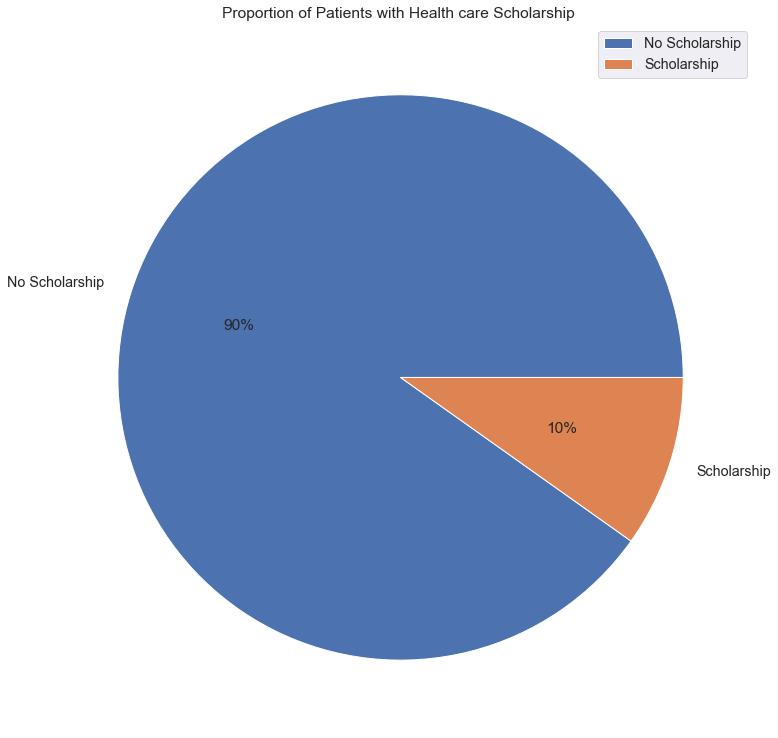

In [170]:
df['Scholarship'].value_counts().plot(kind='pie',autopct ='%.0f%%',figsize=(15,13))
plt.ylabel('')
plt.legend()
plt.title('Proportion of Patients with Health care Scholarship ');

Only 10% of the patients are on the health welfare program

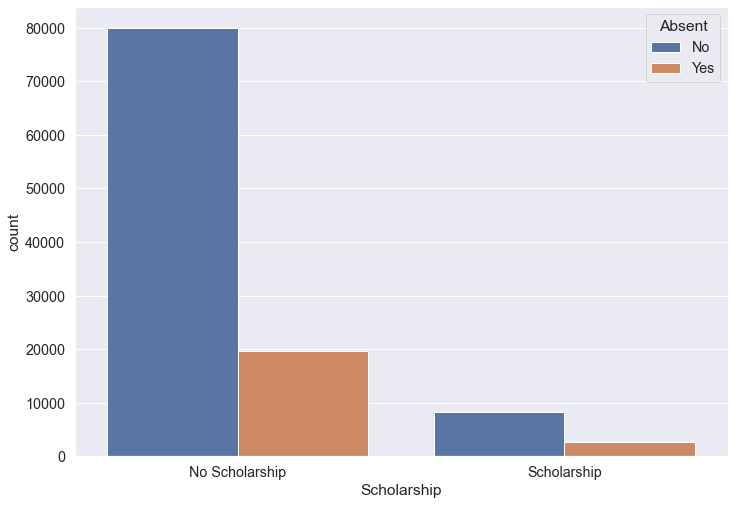

In [171]:
sns.countplot(x='Scholarship',data=df,hue='Absent')
sns.set(font_scale=1.3)

The Scholarship also follows a common trend of a huge percentage attending the hospital appointment

# Multivariate Analysis
Studying how the variables relate with one another and how they can help in predicting the target variable. How do the variables affect each other(Correlation) and affects the target variable.

Gender vs Scholarship

Scholarship vs Agegroup

Plotting a Correlogram

In [172]:
#insppecting the dataset
df.head()

PatientID  AppointmentID Gender  Age      Neighbourhood  \
0   29872499824296        5642903      F   62    JARDIM DA PENHA   
1  558997776694438        5642503      M   56    JARDIM DA PENHA   
2    4262962299951        5642549      F   62      MATA DA PRAIA   
3     867951213174        5642828      F    8  PONTAL DE CAMBURI   
4    8841186448183        5642494      F   56    JARDIM DA PENHA   

      Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  \
0  No Scholarship             1         0           0         0             0   
1  No Scholarship             0         0           0         0             0   
2  No Scholarship             0         0           0         0             0   
3  No Scholarship             0         0           0         0             0   
4  No Scholarship             1         1           0         0             0   

  Absent AppointmentDate Appointmentday ScheduledDate WaitingInterval  \
0     No      2016-04-29         Friday    2016-04-29          0 days   
1     No      2016-04-29         Friday    2016-04-29          0 days   
2     No      2016-04-29         Friday    2016-04-29          0 days   
3     No      2016-04-29         Friday    2016-04-29          0 days   
4     No      2016-04-29         Friday    2016-04-29          0 days   

        Agegroup  
0  61 - 80 years  
1  41 - 60 years  
2  61 - 80 years  
3   0 - 20 years  
4  41 - 60 years

In [173]:
#changing the categorical variables to numbers so it can be read by the computer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_corr =df.copy()
df_corr['Absent']=le.fit_transform(df_corr['Absent'].astype(str))
df_corr['Gender']=le.fit_transform(df_corr['Gender'].astype(str))
df_corr['Scholarship']=le.fit_transform(df_corr['Scholarship'].astype(str))

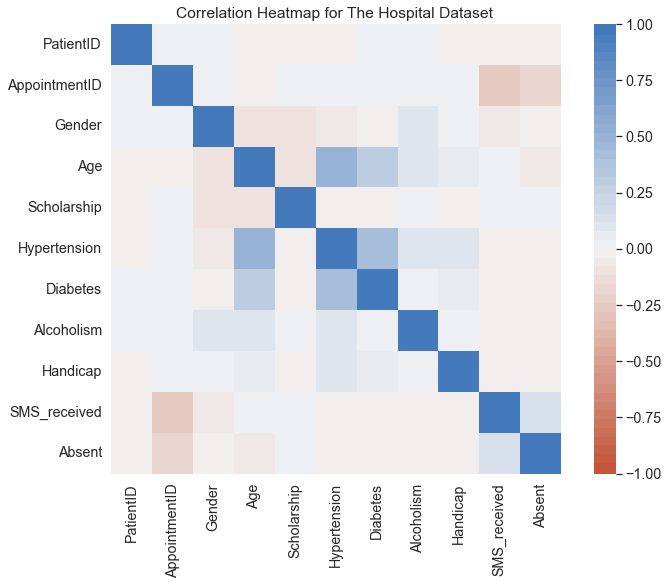

In [174]:
#plotting a correlation heat map
sns.heatmap(
df_corr.corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 250, n=50),
square=True
);
plt.title('Correlation Heatmap for The Hospital Dataset ');


**1. Gender vs Scholarship**

We noticed that female patients attend hospital appointments better than the males. Could that be because the females are favoured under the scholarship program.

C:\Users\ashin\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


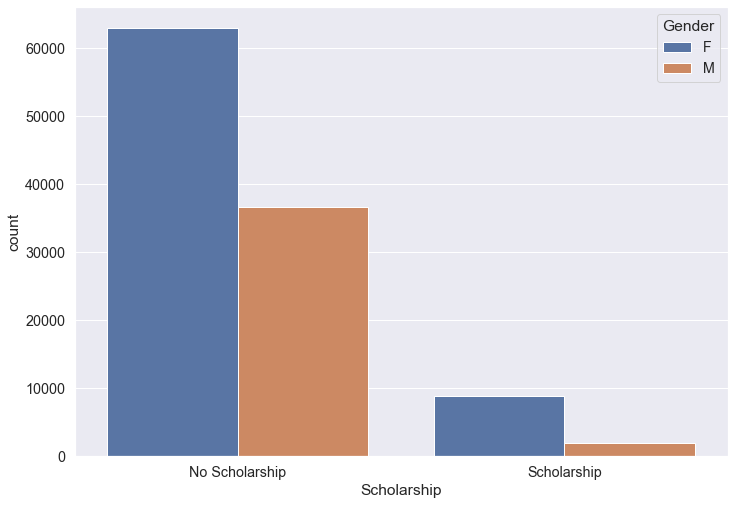

In [175]:
df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True);
sns.countplot(x='Scholarship',hue='Gender',data=df);

Text(0.5, 1.0, 'Proportion of Scholarship by Gender')

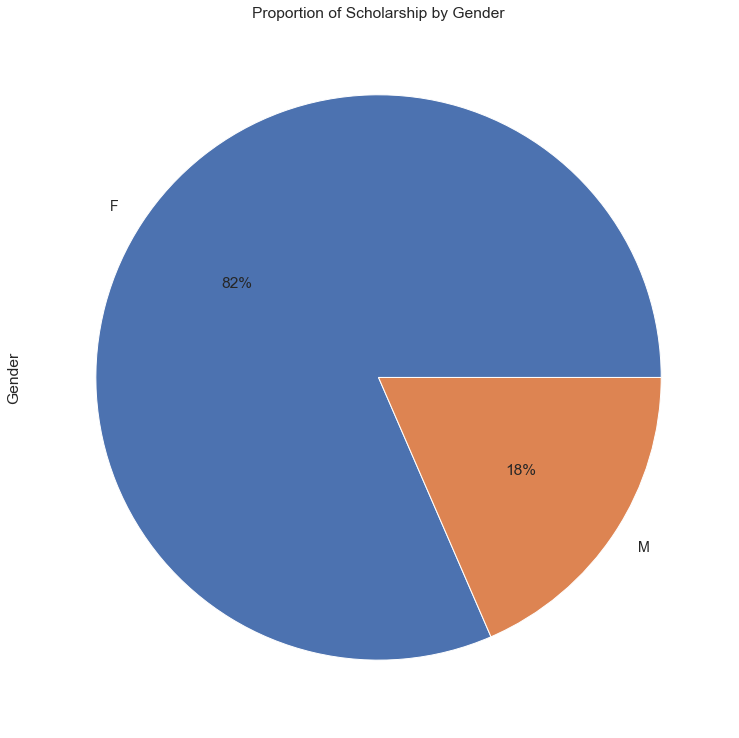

In [176]:
df_sch = df[df.Scholarship == 'Scholarship']
df_sch
df_sch['Gender'].value_counts().plot(kind='pie',autopct ='%.0f%%',figsize=(15,13))
plt.title('Proportion of Scholarship by Gender')

Looking at the Scholarship Program, only 18% are males which means they may not have been favoured by the program

**2. Age vs Scholarship**
Tocheck if Old or young people are favoured by the scholarship program


In [177]:
sns.countplot(x='Scholarship',hue='Agegroup',data=df)
sns.set(rc={'figure.figsize':(15,13)})

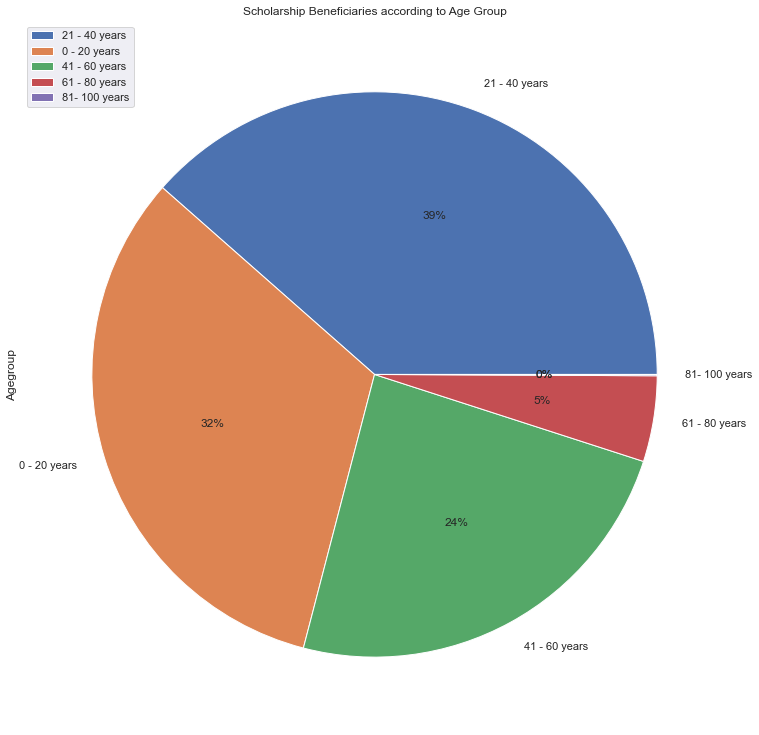

In [178]:
df_sch['Agegroup'].value_counts().plot(kind='pie',autopct ='%.0f%%',figsize=(15,13))
plt.title('Scholarship Beneficiaries according to Age Group')
plt.legend()

The Scholarship program favours Young people as the people aged from 0-40 years accounts for more than 70 % of the beneficiaries

<a id='conclusions'></a>
## Conclusion

A brief Recap of the Research Questions

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2. How do the Factors vary with Each Other?

**Research Areas**
1. `Target Variable(Absent)`: studying the trends in the absent study overall proportions to help in the analysis with other variables
2. `Univariate Analysis`: Studying each variable to uncover patterns and how they relate with the target variable. How does `Age`, `Gender`, `Neighbourhood` and `Scholarship` influence a patient from attending the Hospital appointment.
3. `Multivariate Analysis`: Studyying how the variables relate with one another and how they can help in predicting the target variable. How do the variables affect each other(Correlation) and affects the target variable.



Gender vs Scholarship

AgeGroup vs Scholarsip

**Age**

The distribution of the age is positively skewed with a median age of 37 years old. The range is 0-115 years with the prescence of a high outlier(one patient is very old). Across all age groups, there's a common trend of most patients attending their hospital appointments with people aged 41-60 years having the highest attendance. The largest percentage of Patients missing the hospital appointment is from the 21-40 years age group. This is as a result of people around that age group having to work for hours/lots of commitments or picking up habits like alcoholism that will not allow them attend

**Gender**

A huge proportion of all patients are Females. Over 70000 females and about 40000 males.65% of the patients are Females and Males account for 35%. A huge percentage of each gender did not miss the hospital appointment. The proportion of Males and females that did not miss the hospital appointment are almost the same, 80%


**Neighbourhood**

The JARDIM  CAMBURI Neighbourhood has the highest number of patients with about 8000 patients and highest attendance rate. The PARQUE INDUSTRIAL has the lowest number of patients and attendance rate. This could be due to the location.

**Scholarship**


A huge proportion of the patients are not under the scholarship program. Only 10% of the patients are on the health welfare program The Scholarship Beneficiaries also follows a common trend of a huge percentage of patients attending the hospital appointment.

**Gender vs Scholarship**

Looking at the Scholarship Program, only 18% are males which means they may not have been favoured by the program. This could be one of the factors affecting the total population proportion of males missing hospital appointments.

**Age vs Scholarship**

The Scholarship program favours Young people as the people aged from 0-40 years accounts for more than 70% of the beneficiaries. 

**LIMITATIONS**

1. Time was set to 00:00:00 for all cases, analysis was only carried in days. Cases of Having an appointment and schedule on the same day could not be used for the analysis
2. The data was not totally consistent, some unusual forms of data and irregularities were found which could have affected the analysis because it was dropped.
3. Most of the columns are categorical, hence the use of Bar charts and Pie charts, Only Age was quantitative and could be visualised with appropraite means.
4. The Neighbourhood Data should have included the gographical coordinates for better analysis as to how a location can affect the choice of the patient


## References


1.https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
2.https://www.analyticsvidhya.com/blog/2022/02/exploratory-data-analysis-in-python/
3.https://mugekuskon.medium.com/how-to-perform-exploratory-data-analysis-5c3d944c13ff
4.https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
5.https://towardsdatascience.com/exploratory-analysis-python-kaggle-data-b0afb6ec1788

